In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.iloc[:,3:]

In [5]:
data.head()

,Annual Income (k),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


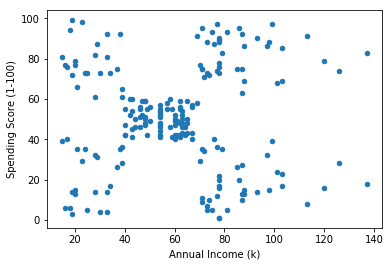

In [6]:
data.plot.scatter('Annual Income (k)', 'Spending Score (1-100)')
plt.show()

In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [8]:
sse = []

In [9]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

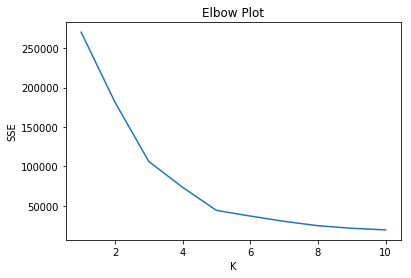

In [10]:
plt.plot(range(1,11), sse)
plt.title('Elbow Plot')
plt.xlabel("K")
plt.ylabel('SSE')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
cluster_labels = kmeans.predict(data)

In [12]:
cluster_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [13]:
data = data.values

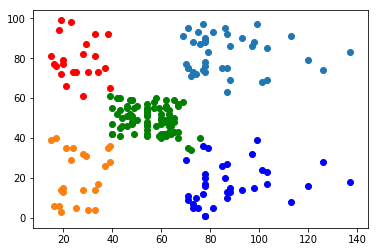

In [14]:
plt.scatter(data[cluster_labels==0, 0],data[cluster_labels==0, 1], color = 'r')
plt.scatter(data[cluster_labels==1, 0],data[cluster_labels==1, 1], color = 'g')
plt.scatter(data[cluster_labels==2, 0],data[cluster_labels==2, 1], color = 'b')
plt.scatter(data[cluster_labels==3, 0],data[cluster_labels==3, 1], color = None)
plt.scatter(data[cluster_labels==4, 0],data[cluster_labels==4, 1], color = None)
plt.show()

In [15]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [16]:
data = pd.read_csv('Mall_Customers.csv')
data = data.iloc[:,3:]

In [17]:
model = AgglomerativeClustering(n_clusters=5, linkage = 'complete')
model.fit(data)
cluster_labels = model.labels_

In [18]:
data = data.values

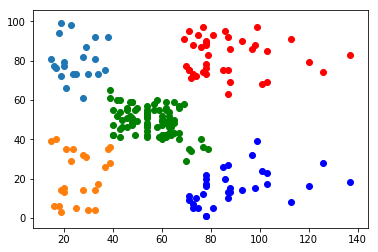

In [19]:
plt.scatter(data[cluster_labels==0, 0],data[cluster_labels==0, 1], color = 'r')
plt.scatter(data[cluster_labels==1, 0],data[cluster_labels==1, 1], color = 'g')
plt.scatter(data[cluster_labels==2, 0],data[cluster_labels==2, 1], color = 'b')
plt.scatter(data[cluster_labels==3, 0],data[cluster_labels==3, 1], color = None)
plt.scatter(data[cluster_labels==4, 0],data[cluster_labels==4, 1], color = None)
plt.show()

In [20]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

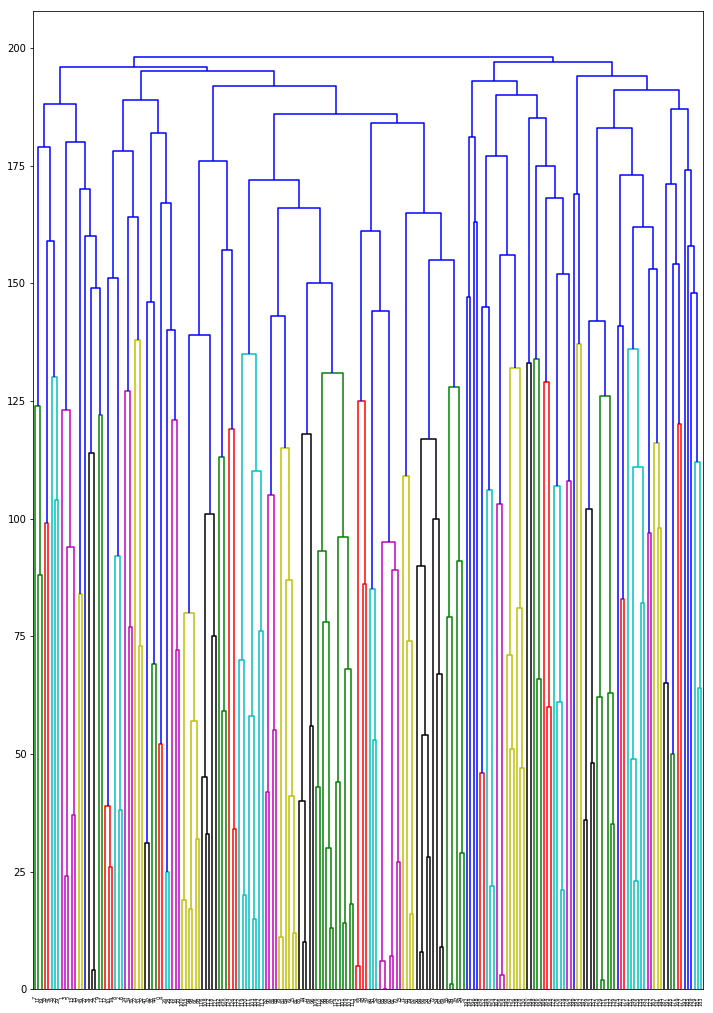

In [21]:
plt.figure(figsize = (12,18))
plot_dendrogram(model)
plt.show()

In [22]:
data = pd.read_csv('Mall_Customers.csv')
data = data.iloc[:,3:]

In [24]:
image = plt.imread('colorful.jpg')

In [25]:
image.shape

(183, 275, 3)

In [26]:
h, w, dim = image.shape

In [27]:
model = KMeans(n_clusters = 2)

In [28]:
image = image.reshape(h*w, dim)

In [29]:
model.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
labels = model.predict(image)

In [31]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
labels.shape

(50325,)

In [33]:
model.cluster_centers_

array([[ 10.08035037,   7.00662115,   5.36719774],
       [192.86889858, 125.03591691,  49.48755099]])

In [34]:
centers = np.array([[1,2,3],[2,3,4]])
l = [0,1,1,0]

In [35]:
centers([l])

TypeError: 'numpy.ndarray' object is not callable

In [36]:
new_image = model.cluster_centers_[labels]

In [37]:
new_image = new_image.reshape(h,w,dim)

In [38]:
new_image = new_image /255

In [39]:
new_image.shape

(183, 275, 3)

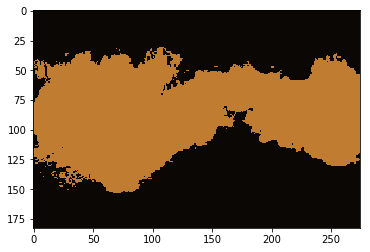

In [40]:
plt.imshow(new_image)
plt.show()